In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
modelo=pd.read_csv('data/modelo.csv',low_memory=False)

In [3]:
modelo.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
modelo.drop(['url', 'sku', 'skus','channel','staticpage','condition','storage','color','search_engine','device_type','campaign_source','country','region','search_term','new_vs_returning','city','region','screen_resolution','operating_system_version','browser_version'], axis=1, inplace=True)

In [5]:
training= pd.read_csv('data/training.csv',low_memory=False)

# Armado del modelo

In [6]:
modelo.sort_values('person',inplace=True)

In [7]:
import calendar

modelo['timestamp'] = pd.to_datetime(modelo['timestamp'])
modelo['dia']=modelo['timestamp'].dt.dayofyear


modelo['dias_distintos'] = modelo['person'].map(modelo.groupby(['person',(modelo['timestamp'].dt.month==5) ] )['dia'].nunique().unstack()[True])   
modelo['dias_distintos']=modelo['dias_distintos'].fillna(0).astype(int)

modelo['ultima_visita']=modelo['person'].map(modelo.groupby('person' )['dia'].min())    
modelo['ultima_visita']=modelo['ultima_visita'].fillna(0).astype(int)
modelo.drop('dia',1,inplace=True)


modelo['modelos_distintos_vistos']= modelo['person'].map( modelo.groupby('person')['model'].nunique())
modelo.drop('model',1,inplace=True)

"""
modelo['campaña_ultima_semana']=modelo['person'].map(modelo.groupby(['person',(modelo['timestamp'].dt.month==5) & (modelo['timestamp'].dt.day>23) & (modelo['event']=="ad campaign hit")]).size().unstack()[True]) 
modelo['campaña_ultima_semana']=modelo['campaña_ultima_semana'].fillna(0).astype(int)
"""

modelo['busqueda_celular']=modelo['person'].map(modelo.groupby(['person',(modelo['timestamp'].dt.month==5) & (modelo['timestamp'].dt.day>23) & (modelo['event']=="searched products")]).size().unstack()[True]) 
modelo['busqueda_celular']=modelo['busqueda_celular'].fillna(0).astype(int)


modelo['total_visitas_usuario'] = modelo.groupby('person')['person'].transform('count')


modelo['visitas_ultimo_mes']=modelo['person'].map(modelo.groupby(['person',(modelo['timestamp'].dt.month)==5]).size().unstack()[True])
modelo['visitas_ultimo_mes']=modelo['visitas_ultimo_mes'].fillna(0).astype(int)


modelo['visitas_ultimos_15']=modelo['person'].map(modelo.groupby(['person', (modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>15)]).size().unstack()[True])
modelo['visitas_ultimos_15']=modelo['visitas_ultimos_15'].fillna(0).astype(int)


modelo['visitas_ultima_semana']=modelo['person'].map(modelo.groupby(['person', (modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>23)]).size().unstack()[True])
modelo['visitas_ultima_semana']=modelo['visitas_ultima_semana'].fillna(0).astype(int)


modelo['visitas_ultimos_3']=modelo['person'].map(modelo.groupby(['person', (modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>27)]).size().unstack()[True])
modelo['visitas_ultimos_3']=modelo['visitas_ultimos_3'].fillna(0).astype(int)


modelo['total_checkout']=modelo['person'].map(modelo.groupby(['person','event']).size().unstack()['checkout'])
modelo['total_checkout']=modelo['total_checkout'].fillna(0).astype(int)


modelo['checkouts_ultimo_mes']=modelo['person'].map(modelo.groupby(['person','event',modelo['timestamp'].dt.month==5 ]).size().unstack()[True].unstack()['checkout'])   
modelo['checkouts_ultimo_mes']=modelo['checkouts_ultimo_mes'].fillna(0).astype(int)


"""
modelo['checkouts_ultima_semana']=modelo['person'].map(modelo.groupby(['person','event',(modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>23)]).size().unstack()[True].unstack()['checkout'])
modelo['checkouts_ultima_semana']=modelo['checkouts_ultima_semana'].fillna(0).astype(int)



modelo['total_compras']=modelo['person'].map(modelo.groupby(['person','event']).size().unstack()['conversion'])
modelo['total_compras']=modelo['total_compras'].fillna(0).astype(int)



modelo['compras_ultimo_mes']=modelo['person'].map(modelo.groupby(['person','event',modelo['timestamp'].dt.month==5 ]).size().unstack()[True].unstack()['conversion'])
modelo['compras_ultimo_mes']=modelo['compras_ultimo_mes'].fillna(0).astype(int)



modelo['compras_ultima_semana']=modelo['person'].map(modelo.groupby(['person','event',(modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>23)]).size().unstack()[True].unstack()['conversion'])
modelo['compras_ultima_semana']=modelo['compras_ultima_semana'].fillna(0).astype(int)


modelo['subscripciones_ultimo_mes']=modelo['person'].map(modelo.groupby(['person','event',modelo['timestamp'].dt.month==5 ]).size().unstack()[True].unstack()['lead'])
modelo['subscripciones_ultimo_mes']=modelo['subscripciones_ultimo_mes'].fillna(0).astype(int)
"""


"\nmodelo['checkouts_ultima_semana']=modelo['person'].map(modelo.groupby(['person','event',(modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>23)]).size().unstack()[True].unstack()['checkout'])\nmodelo['checkouts_ultima_semana']=modelo['checkouts_ultima_semana'].fillna(0).astype(int)\n\n\n\nmodelo['total_compras']=modelo['person'].map(modelo.groupby(['person','event']).size().unstack()['conversion'])\nmodelo['total_compras']=modelo['total_compras'].fillna(0).astype(int)\n\n\n\nmodelo['compras_ultimo_mes']=modelo['person'].map(modelo.groupby(['person','event',modelo['timestamp'].dt.month==5 ]).size().unstack()[True].unstack()['conversion'])\nmodelo['compras_ultimo_mes']=modelo['compras_ultimo_mes'].fillna(0).astype(int)\n\n\n\nmodelo['compras_ultima_semana']=modelo['person'].map(modelo.groupby(['person','event',(modelo['timestamp'].dt.month==5)& (modelo['timestamp'].dt.day>23)]).size().unstack()[True].unstack()['conversion'])\nmodelo['compras_ultima_semana']=modelo['compras_

In [8]:
modelo=modelo.drop_duplicates(subset=['person'])
modelo.drop(['timestamp','event'], 1, inplace=True)

In [9]:
modelo=pd.merge(modelo, training, on='person', how='left')

In [10]:
modelo.head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
0,0008ed71,1,137,3,0,6,6,6,0,0,3,3,0.0
1,00091926,22,123,36,0,448,448,261,47,19,2,2,NaN
2,00091a7a,0,85,3,0,10,0,0,0,0,0,0,NaN
3,000ba417,3,137,26,0,206,206,206,138,0,6,6,NaN
4,000c79fe,1,149,1,9,17,17,17,17,17,1,1,0.0


In [11]:
a_predecir=modelo[modelo['label'].isnull()]
a_predecir.head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
1,00091926,22,123,36,0,448,448,261,47,19,2,2,NaN
2,00091a7a,0,85,3,0,10,0,0,0,0,0,0,NaN
3,000ba417,3,137,26,0,206,206,206,138,0,6,6,NaN
5,000e4d9e,9,136,37,0,411,411,411,112,75,1,1,NaN
6,000e619d,4,135,23,0,68,68,58,0,0,1,1,NaN


In [12]:
modelo.drop(modelo[modelo['label'].isnull()].index,inplace=True)
modelo['label']=modelo['label'].astype(int)
modelo.head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
0,0008ed71,1,137,3,0,6,6,6,0,0,3,3,0
4,000c79fe,1,149,1,9,17,17,17,17,17,1,1,0
10,001802e4,1,151,2,4,19,19,19,19,19,1,1,0
12,0019e639,9,28,26,0,471,290,136,0,0,15,4,0
14,001b0bf9,1,142,1,0,7,7,7,0,0,2,2,0


In [13]:
len(modelo[modelo['label']==1]),len(modelo[modelo['label']==0]) 

(980, 18434)

In [14]:
len(modelo[modelo['label']==1])*100/len(modelo['label']),len(modelo[modelo['label']==0])*100/len(modelo['label'])

(5.047903574739879, 94.95209642526012)

In [15]:
modelo[modelo['label']==1].head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
31,003476c0,1,44,2,0,43,14,0,0,0,0,0,1
38,003d4cac,0,82,2,0,8,0,0,0,0,1,0,1
39,003dd965,1,136,0,0,5,5,5,0,0,0,0,1
43,0042421c,0,61,5,0,22,0,0,0,0,0,0,1
57,006671fd,0,118,5,0,18,0,0,0,0,0,0,1


In [16]:
modelo[modelo['label']==0].head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
0,0008ed71,1,137,3,0,6,6,6,0,0,3,3,0
4,000c79fe,1,149,1,9,17,17,17,17,17,1,1,0
10,001802e4,1,151,2,4,19,19,19,19,19,1,1,0
12,0019e639,9,28,26,0,471,290,136,0,0,15,4,0
14,001b0bf9,1,142,1,0,7,7,7,0,0,2,2,0


In [17]:
modelo[modelo['label']==1].mean()-modelo[modelo['label']==0].mean()

dias_distintos               0.600485
ultima_visita              -20.271700
modelos_distintos_vistos     3.446072
busqueda_celular             0.586515
total_visitas_usuario       43.553997
visitas_ultimo_mes          16.661781
visitas_ultimos_15           9.752915
visitas_ultima_semana       10.056608
visitas_ultimos_3            8.237521
total_checkout               0.165994
checkouts_ultimo_mes        -0.411831
label                        1.000000
dtype: float64

## MACHINE LEARNING

In [18]:
##Ahora empieza ML

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [19]:
#Agarro 250 casos que compraron ,y 1250 que no compraron , y armo un test aparte
from sklearn.utils import shuffle

df1=modelo.loc[modelo['label']==1]
df1=shuffle(df1)
df1=df1.iloc[:250]
modelo.drop(df1.index,inplace=True)
df2=modelo.loc[modelo['label']==0]
df2=shuffle(df2)
df2=df2.iloc[:1250]
modelo.drop(df2.index,inplace=True)
df=df1.append(df2, ignore_index=True)
df = shuffle(df)
xtest=df.drop(['person','label'], axis=1)
ytest=df['label']

## Resample

In [20]:
from sklearn.utils import resample
df_minority_upsampled = resample(modelo[modelo['label']==1], 
                                 replace=True,     # sample with replacement
                                 n_samples=17184,    # to match majority class
                                 random_state=123) # reproducible results
modelo = pd.concat([modelo[modelo['label']==0], df_minority_upsampled])

In [21]:
X = modelo.drop(['person','label'], axis=1)
y = modelo['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.05) 

In [23]:
len(X_train),len(X_test),len(y_train),len(y_test)

(32649, 1719, 32649, 1719)

In [24]:
X_train.head()

,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes
13869,2,148,2,0,16,16,16,16,16,0,0
6733,2,139,1,0,18,18,18,11,11,0,0
22450,19,128,3,0,202,202,96,21,9,9,9
4276,4,142,11,2,174,174,174,159,142,5,5
26513,1,151,3,0,16,16,16,16,16,1,1


In [25]:
y_train.head()

13869    1
6733     1
22450    1
4276     1
26513    0
Name: label, dtype: int32

## Algoritmos de clasificación

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
my_classifier= KNeighborsClassifier(algorithm='brute',p=1,n_jobs=-1)
my_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
           weights='uniform')

In [27]:
metrics.confusion_matrix(ytest, my_classifier.predict(xtest))

array([[1107,  143],
       [ 181,   69]], dtype=int64)

## DECISION TREE

In [28]:
from sklearn import tree
my_classifier2= tree.DecisionTreeClassifier()
my_classifier2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
metrics.confusion_matrix(ytest, my_classifier2.predict(xtest))

array([[1189,   61],
       [ 218,   32]], dtype=int64)

## RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier #a mayor depth, mas precisos los 0, menos los 1,class weight cambia mucho
my_classifier3 = RandomForestClassifier(n_estimators=500,n_jobs=-1,criterion= 'gini',max_depth= 8 ,max_features= 'auto')
my_classifier3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
metrics.confusion_matrix(ytest, my_classifier3.predict(xtest))

array([[1026,  224],
       [  77,  173]], dtype=int64)

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
my_classifier4 = LogisticRegression(C=0.001)
my_classifier4.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
metrics.confusion_matrix(ytest, my_classifier4.predict(xtest))

array([[1033,  217],
       [ 136,  114]], dtype=int64)

## Neuronal Network

In [34]:
from sklearn.neural_network import MLPClassifier
my_classifier5 = MLPClassifier(hidden_layer_sizes=(100,50,100),max_iter=800000)
my_classifier5.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=800000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
metrics.confusion_matrix(ytest, my_classifier5.predict(xtest))

array([[1096,  154],
       [ 129,  121]], dtype=int64)

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
my_classifier6 = GaussianNB()
my_classifier6.fit(X_train,y_train)

GaussianNB(priors=None)

In [37]:
metrics.confusion_matrix(ytest, my_classifier6.predict(xtest))

array([[1102,  148],
       [ 186,   64]], dtype=int64)

## SVM

In [38]:
from sklearn import svm
my_classifier7 =svm.SVC()
my_classifier7.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
metrics.confusion_matrix(ytest, my_classifier7.predict(xtest))

array([[1200,   50],
       [ 218,   32]], dtype=int64)

## AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
my_classifier8 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), n_estimators=2000,algorithm="SAMME", learning_rate=1, random_state=42)
my_classifier8.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=2000, random_state=42)

In [41]:
metrics.confusion_matrix(ytest, my_classifier8.predict(xtest))

array([[1001,  249],
       [  56,  194]], dtype=int64)

## XGBOOST

In [42]:
import xgboost as xgb
my_classifier9 = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
my_classifier9.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
metrics.confusion_matrix(ytest, my_classifier9.predict(xtest))

d:\programas\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[950, 300],
       [ 56, 194]], dtype=int64)

## Voting Classifier

In [44]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[  ('RF', my_classifier3), ('ADA', my_classifier8),('XGB', my_classifier9)], voting='soft', n_jobs =-1)
vclf = vclf.fit(X_train, y_train)
predictions = vclf.predict(xtest)
accuracy_score(ytest, predictions),roc_auc_score(ytest, predictions)

d:\programas\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(0.798, 0.7764)

In [45]:
metrics.confusion_matrix(ytest, predictions)

array([[1011,  239],
       [  64,  186]], dtype=int64)

## Resultados

In [46]:
clasificadores={"KNN": my_classifier , "Decision Tree": my_classifier2, "Random Forest": my_classifier3, "Logistic regression": my_classifier4,"Neuronal Network":my_classifier5,
                "Naive Bayes":my_classifier6, "SVM":my_classifier7,"Ada boost": my_classifier8, "XGBOOST":my_classifier9 , "VCLF":vclf}
resultados={}
for key,value in clasificadores.items():
    prediction=value.predict(xtest)
    matrix=metrics.confusion_matrix(ytest, prediction)
    resultados[key]=[accuracy_score(ytest, prediction),f1_score(ytest, prediction, average='weighted'),precision_score(ytest, prediction, average='weighted'),recall_score(ytest, prediction, average='weighted'),
    roc_auc_score(ytest, prediction),matrix[0][1],matrix[1][0],matrix[0][0],matrix[1][1]  ]
resultados['Metric']=["Accuracy","F1 Score","Precision","Recall","ROC AUC Score","No aciertos 0","No aciertos 1","Aciertos 0","Aciertos 1"]
resultados= pd.DataFrame(resultados)
resultados.set_index('Metric',inplace=True)
resultados

d:\programas\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\programas\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,KNN,Decision Tree,Random Forest,Logistic regression,Neuronal Network,Naive Bayes,SVM,Ada boost,XGBOOST,VCLF
Metric,,,,,,,,,,
Accuracy,0.784000,0.814000,0.799333,0.764667,0.811333,0.777333,0.821333,0.796667,0.762667,0.798000
F1 Score,0.776734,0.776927,0.815861,0.777131,0.814873,0.769843,0.781754,0.816475,0.788750,0.816583
Precision,0.770472,0.761565,0.847787,0.793786,0.818912,0.763306,0.770259,0.862170,0.852397,0.856662
Recall,0.784000,0.814000,0.799333,0.764667,0.811333,0.777333,0.821333,0.796667,0.762667,0.798000
ROC AUC Score,0.580800,0.539600,0.756400,0.641200,0.680400,0.568800,0.544000,0.788400,0.768000,0.776400
No aciertos 0,143.000000,61.000000,224.000000,217.000000,154.000000,148.000000,50.000000,249.000000,300.000000,239.000000
No aciertos 1,181.000000,218.000000,77.000000,136.000000,129.000000,186.000000,218.000000,56.000000,56.000000,64.000000
Aciertos 0,1107.000000,1189.000000,1026.000000,1033.000000,1096.000000,1102.000000,1200.000000,1001.000000,950.000000,1011.000000
Aciertos 1,69.000000,32.000000,173.000000,114.000000,121.000000,64.000000,32.000000,194.000000,194.000000,186.000000


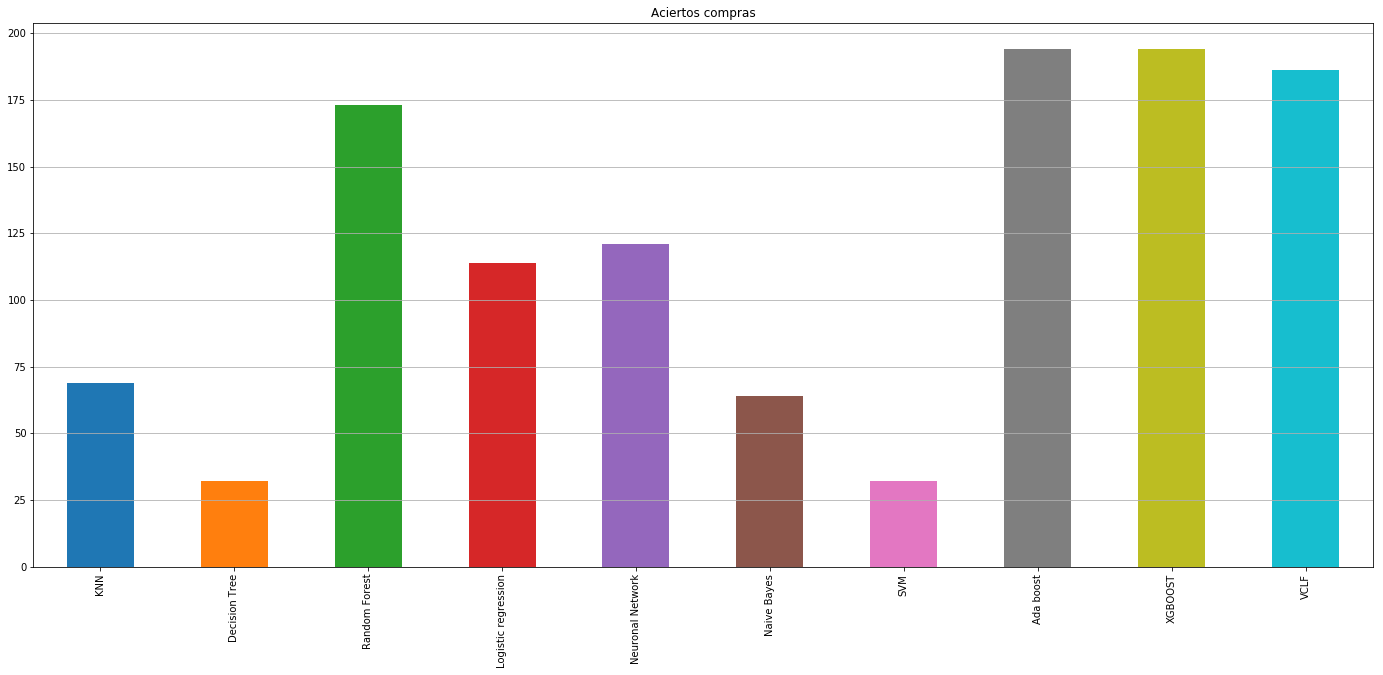

In [47]:
resultados.iloc[-1].plot(kind='bar',figsize=(24,10))
plt.title("Aciertos compras")
plt.grid(axis='y')

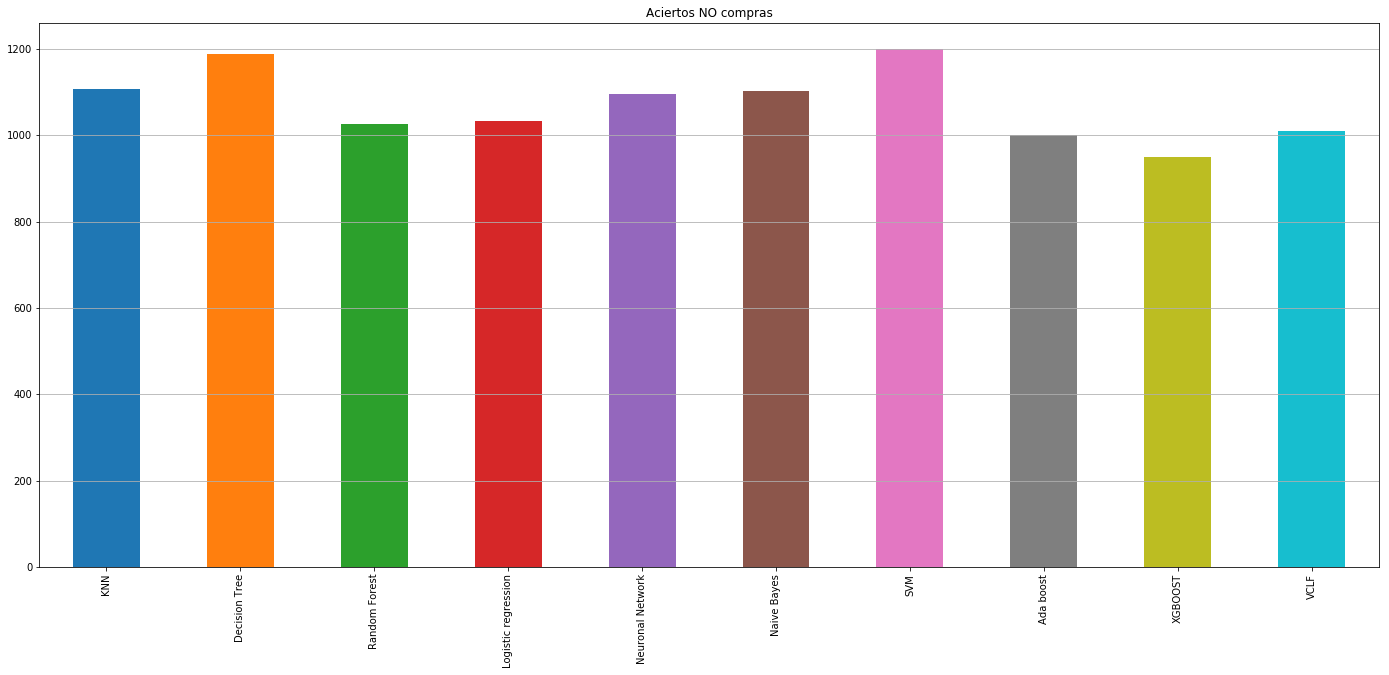

In [48]:
resultados.iloc[-2].plot(kind='bar',figsize=(24,10))
plt.title("Aciertos NO compras")
plt.grid(axis='y')

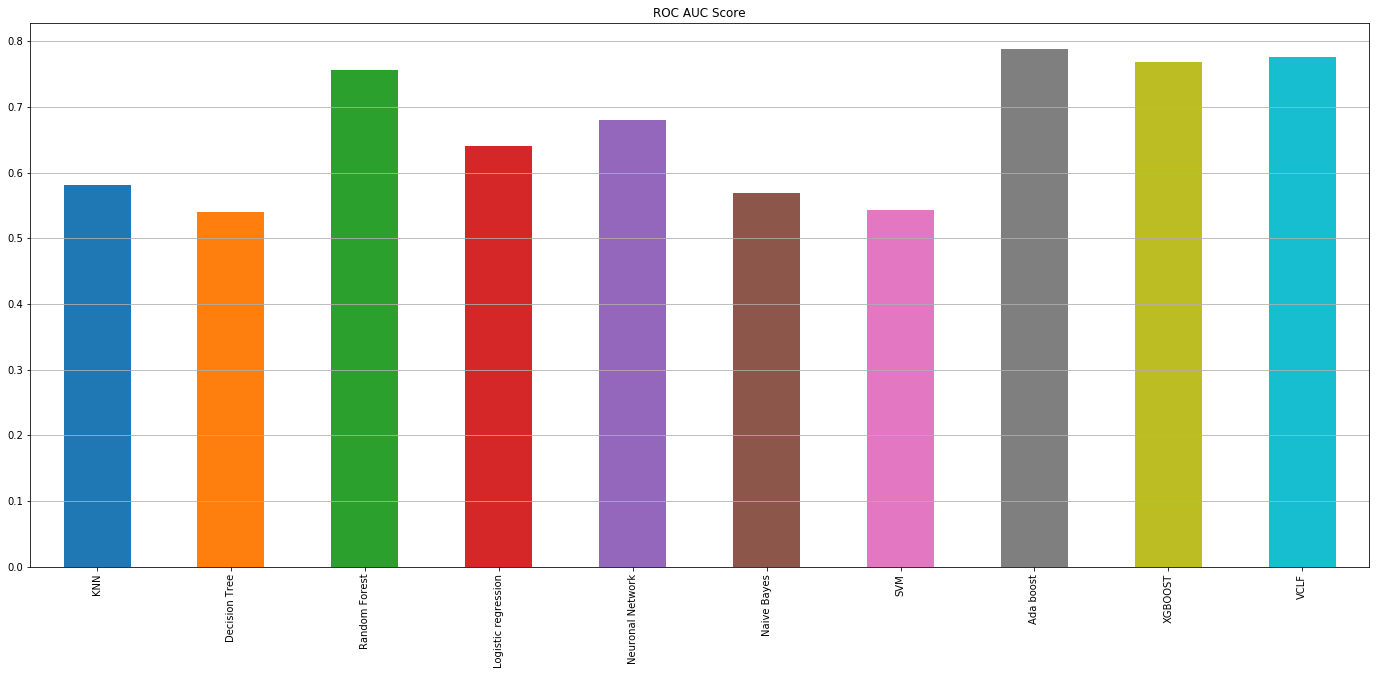

In [49]:
resultados.iloc[4].plot(kind='bar',figsize=(24,10))
plt.title("ROC AUC Score")
plt.grid(axis='y')

## KAGGLE PREDICTIONS

In [50]:
kaggle= pd.read_csv('data/kaggle.csv',low_memory=False)

In [51]:
kaggle=pd.merge(kaggle, a_predecir, on='person', how='inner')

In [52]:
kaggle.head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label
0,4886f805,1,138,1,0,9,9,9,0,0,1,1,NaN
1,0297fc1e,15,9,15,0,567,173,126,53,8,7,2,NaN
2,2d681dd8,2,138,3,1,26,26,26,16,0,1,1,NaN
3,cccea85e,13,127,57,1,836,836,449,270,252,1,1,NaN
4,4c8a8b93,5,138,9,0,257,257,257,0,0,2,2,NaN


In [53]:
predictions=vclf.predict_proba(kaggle.drop(['person','label'], axis=1)) 

In [54]:
kaggle['prediction0'] = predictions[:,0]
kaggle['prediction1'] = predictions[:,1]

In [55]:
kaggle.head()

,person,dias_distintos,ultima_visita,modelos_distintos_vistos,busqueda_celular,total_visitas_usuario,visitas_ultimo_mes,visitas_ultimos_15,visitas_ultima_semana,visitas_ultimos_3,total_checkout,checkouts_ultimo_mes,label,prediction0,prediction1
0,4886f805,1,138,1,0,9,9,9,0,0,1,1,NaN,0.742021,0.257979
1,0297fc1e,15,9,15,0,567,173,126,53,8,7,2,NaN,0.442341,0.557659
2,2d681dd8,2,138,3,1,26,26,26,16,0,1,1,NaN,0.701387,0.298613
3,cccea85e,13,127,57,1,836,836,449,270,252,1,1,NaN,0.542595,0.457405
4,4c8a8b93,5,138,9,0,257,257,257,0,0,2,2,NaN,0.587328,0.412672


In [56]:
kaggle[['person','prediction1']].to_csv('predicciones.csv', encoding='utf-8', index=False)